<a href="https://colab.research.google.com/github/hillelMerran/data-science/blob/main/Logistic_regression_heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression project

## Import data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/hillelMerran/data-science/main/Logistic_regression/processed.cleveland.data'
df = pd.read_csv(url)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Brief exploration of the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


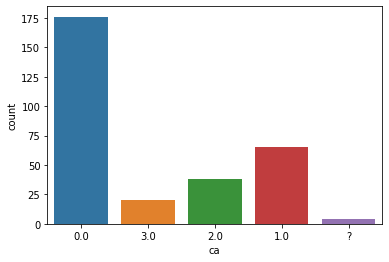

In [5]:
sns.countplot(data=df, x='ca');

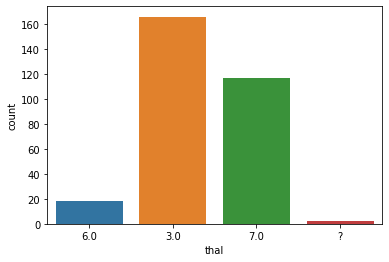

In [6]:
sns.countplot(data=df, x='thal');

In [7]:
df[(df['ca']=='?') | (df['thal']=='?')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


According to the data description, '*thal*' is a categorial caracteristic, so we don't want to modify it except the unknown values.

Let's just remove the unknown values as they are very few.

In [8]:
df = df.drop(df[df['thal'] == '?'].index)

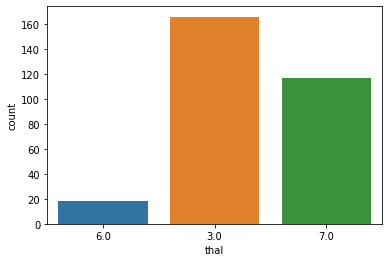

In [9]:
sns.countplot(data=df, x='thal');

On the other hand, '*ca*' caracteristic is supposed to be numerical value, so we'll drop the unknown values and convert it to integer.

In [10]:
df = df.drop(df[df['ca'] == '?'].index)
df['ca'] = pd.to_numeric(df['ca'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    object 
 13  num       297 non-null    int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 34.8+ KB


In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,3.158249,0.964859,1.0,3.0,3.0,4.0,4.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


The 'num' field isn't a boolean value as it is supposed to be.

Let's probe it.

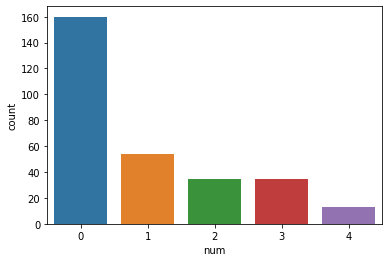

In [13]:
sns.countplot(data=df, x='num');

There is a significant number of cases with higher value than 1.

Let's inspect if a greater value means a greater probability of heart disease presence. In that purpose, we'll isolate 3 of the most influential caracteristics and determine if there is a correlation between the value of 'num' and them.

In [14]:
df.corr()['num'].sort_values()

thalach    -0.420639
fbs         0.049040
chol        0.066448
trestbps    0.159620
restecg     0.184136
age         0.222156
sex         0.226797
slope       0.374689
exang       0.391613
cp          0.404248
oldpeak     0.501461
ca          0.521178
num         1.000000
Name: num, dtype: float64

3 most influential caracteristics:


*   oldpeak
*   thalach
*   cp





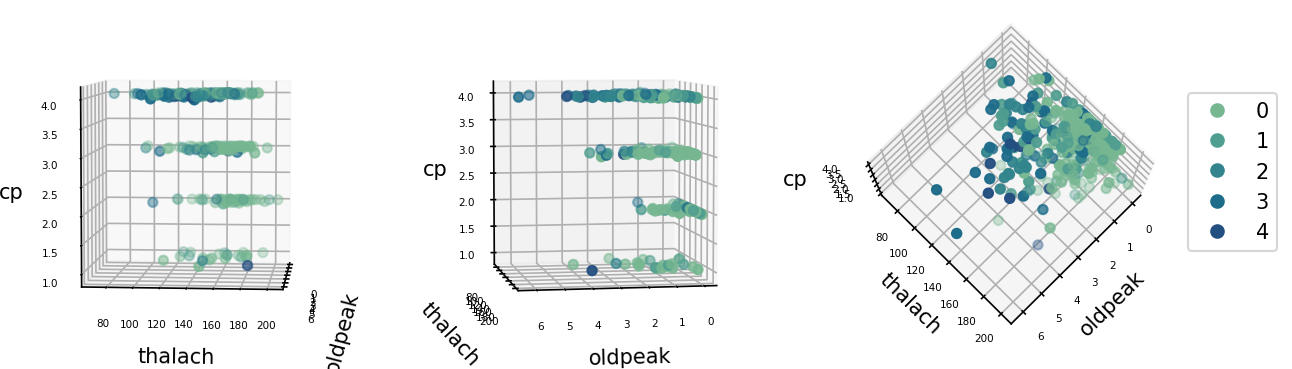

In [15]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(sns.color_palette("crest", 5).as_hex())

fig = plt.figure(figsize=(10,3),dpi=150)

ax = fig.add_subplot(1,3,1, projection='3d')
sc = ax.scatter(df['oldpeak'],df['thalach'],df['cp'], c=df['num'], marker='o', cmap=cmap)
ax.set_xlabel('oldpeak')
ax.set_ylabel('thalach')
ax.set_zlabel('cp')
ax.view_init(5,5)
ax.xaxis.set_tick_params(labelsize=5)
ax.yaxis.set_tick_params(labelsize=5)
ax.zaxis.set_tick_params(labelsize=5)

ax2 = fig.add_subplot(1,3,2, projection='3d')
sc = ax2.scatter(df['oldpeak'],df['thalach'],df['cp'], c=df['num'], marker='o', cmap=cmap)
ax2.set_xlabel('oldpeak')
ax2.set_ylabel('thalach')
ax2.set_zlabel('cp')
ax2.view_init(5,80)
ax2.xaxis.set_tick_params(labelsize=5)
ax2.yaxis.set_tick_params(labelsize=5)
ax2.zaxis.set_tick_params(labelsize=5)

ax3 = fig.add_subplot(1,3,3, projection='3d')
sc = ax3.scatter(df['oldpeak'],df['thalach'],df['cp'], c=df['num'], marker='o', cmap=cmap)
ax3.set_xlabel('oldpeak')
ax3.set_ylabel('thalach')
ax3.set_zlabel('cp')
ax3.view_init(80,45)
ax3.xaxis.set_tick_params(labelsize=5)
ax3.yaxis.set_tick_params(labelsize=5)
ax3.zaxis.set_tick_params(labelsize=5)


plt.legend(*sc.legend_elements(), bbox_to_anchor=(1, .8), loc=2);

Let's separate the 0-value from others for more clarity.

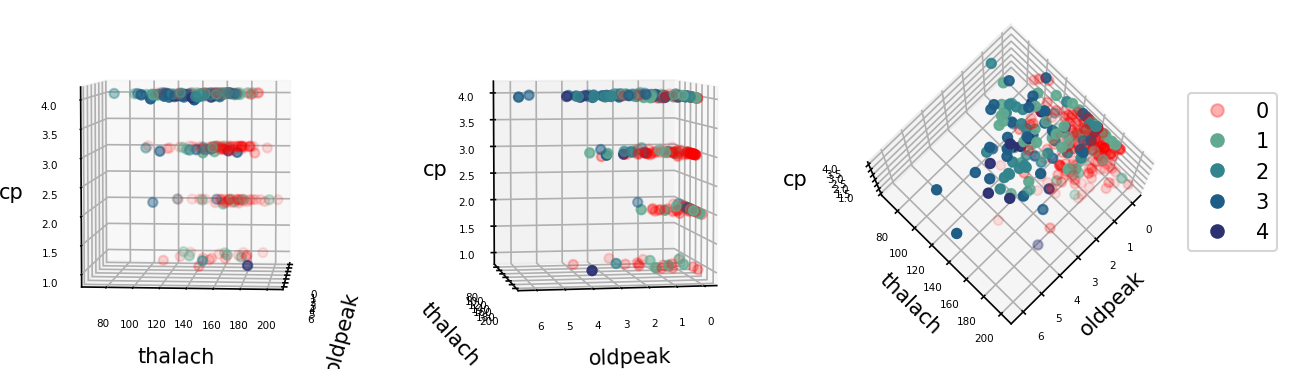

In [16]:
from matplotlib import cm

crest = cm.get_cmap('crest', 5)
newcolors = crest(np.linspace(0, 1, 5))
pink = np.array([1, 0, 0, .3])
newcolors[:1, :] = pink
newcmp = ListedColormap(newcolors)

fig = plt.figure(figsize=(10,3),dpi=150)

ax = fig.add_subplot(1,3,1, projection='3d')
sc = ax.scatter(df['oldpeak'],df['thalach'],df['cp'], c=df['num'], marker='o', cmap=newcmp)
ax.set_xlabel('oldpeak')
ax.set_ylabel('thalach')
ax.set_zlabel('cp')
ax.view_init(5,5)
ax.xaxis.set_tick_params(labelsize=5)
ax.yaxis.set_tick_params(labelsize=5)
ax.zaxis.set_tick_params(labelsize=5)

ax2 = fig.add_subplot(1,3,2, projection='3d')
sc = ax2.scatter(df['oldpeak'],df['thalach'],df['cp'], c=df['num'], marker='o', cmap=newcmp)
ax2.set_xlabel('oldpeak')
ax2.set_ylabel('thalach')
ax2.set_zlabel('cp')
ax2.view_init(5,80)
ax2.xaxis.set_tick_params(labelsize=5)
ax2.yaxis.set_tick_params(labelsize=5)
ax2.zaxis.set_tick_params(labelsize=5)

ax3 = fig.add_subplot(1,3,3, projection='3d')
sc = ax3.scatter(df['oldpeak'],df['thalach'],df['cp'], c=df['num'], marker='o', cmap=newcmp)
ax3.set_xlabel('oldpeak')
ax3.set_ylabel('thalach')
ax3.set_zlabel('cp')
ax3.view_init(80,45)
ax3.xaxis.set_tick_params(labelsize=5)
ax3.yaxis.set_tick_params(labelsize=5)
ax3.zaxis.set_tick_params(labelsize=5)


plt.legend(*sc.legend_elements(), bbox_to_anchor=(1, .8), loc=2);

It seems there is some correlation as the num value is higher when oldpeak and cp are higher, and thalach is lower - it could make sens to interpret a higher value of 'num' as a higher probability to heart disease.

But for this time, in order to apply the logistic (and not linear) regression, **we'll assume that all the values higher than 1 as a 'high probability of heart disease' state, and all the 0 values as a 'low probability of heart disease' state**.

In [17]:
df.loc[df['num'] > 1] = 1

In [18]:
df['num'].unique()

array([0, 1])

In [19]:
df.corr()['num'].sort_values()

thalach    -0.700318
trestbps   -0.634674
chol       -0.613212
age        -0.605968
cp         -0.364365
slope      -0.150207
restecg     0.126638
oldpeak     0.275559
sex         0.424817
ca          0.460335
fbs         0.500567
exang       0.640347
num         1.000000
Name: num, dtype: float64

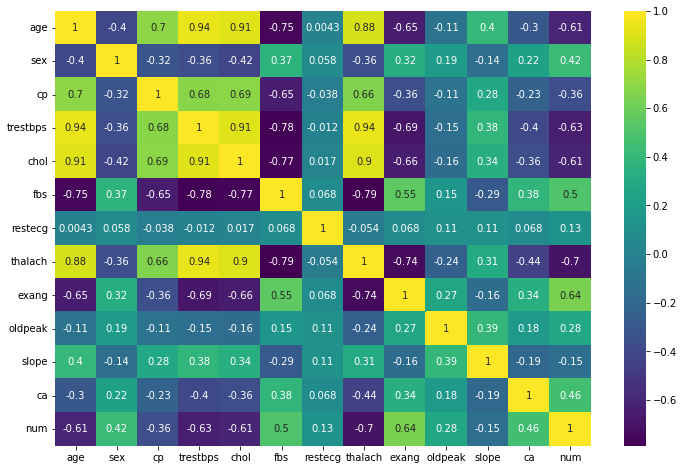

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis');

# Logistic regression


## Train & test split

In [21]:
X = df.drop(labels='num', axis='columns')

In [22]:
y = df['num']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Since the data is relatively short (303 rows), we'll take only 10% as test.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## Scaling

In [25]:
scaler = StandardScaler()

In [26]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Model creating

In [27]:
from sklearn.linear_model import LogisticRegression

In [33]:
log_model = LogisticRegression(max_iter=5000)

In [29]:
from sklearn.model_selection import GridSearchCV

In [34]:
solver=['liblinear','saga']
penalty = ['l1','l2']
C = np.logspace(-2,4,20)
param_grid = {
    'solver': solver,
    'penalty': penalty,
    'C': C
}

In [35]:
grid_model = GridSearchCV(log_model,param_grid=param_grid)

In [36]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': array([1.00000000e-02, 2.06913808e-02, 4.28133240e-02, 8.85866790e-02,
       1.83298071e-01, 3.79269019e-01, 7.84759970e-01, 1.62377674e+00,
       3.35981829e+00, 6.95192796e+00, 1.43844989e+01, 2.97635144e+01,
       6.15848211e+01, 1.27427499e+02, 2.63665090e+02, 5.45559478e+02,
       1.12883789e+03, 2.33572147e+03, 4.83293024e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

**Best hyper params:**

In [37]:
grid_model.best_params_

{'C': 3.359818286283781, 'penalty': 'l1', 'solver': 'liblinear'}

In [38]:
grid_model.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 5000,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(max_iter=5000),
 'n_jobs': None,
 'param_grid': {'solver': ['liblinear', 'saga'],
  'penalty': ['l1', 'l2'],
  'C': array([1.00000000e-02, 2.06913808e-02, 4.28133240e-02, 8.85866790e-02,
         1.83298071e-01, 3.79269019e-01, 7.84759970e-01, 1.62377674e+00,
         3.35981829e+00, 6.95192796e+00, 1.43844989e+01, 2.97635144e+01,
         6.15848211e+01, 1.27427499e+02, 2.63665090e+02, 5.45559478e+02,
         1.12883789e+03, 2.33572147e+03, 4.83293024e+03, 1.00000000e+0

**Best model coefficients:**

In [39]:
coef = grid_model.best_estimator_.coef_
coef

array([[-1.08565009,  0.51624906,  0.19606249,  0.3254144 ,  0.08580117,
        -0.52486389,  0.30523285, -2.18249608,  0.32705184,  0.06544834,
         0.06482069,  0.5832584 ,  0.42967149]])

In [40]:
coef = pd.Series(index = X.columns, data=coef[0])

In [41]:
coef = coef.sort_values()
coef

thalach    -2.182496
age        -1.085650
fbs        -0.524864
slope       0.064821
oldpeak     0.065448
chol        0.085801
cp          0.196062
restecg     0.305233
trestbps    0.325414
exang       0.327052
thal        0.429671
sex         0.516249
ca          0.583258
dtype: float64

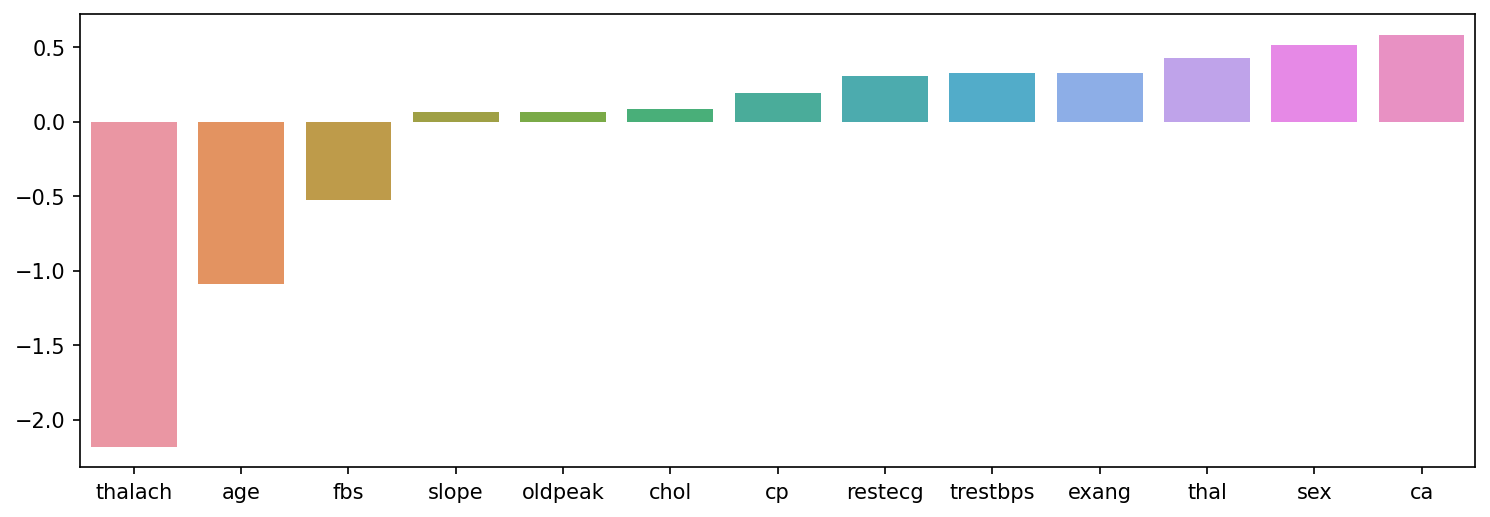

In [42]:
plt.figure(dpi=150, figsize=(12,4))
sns.barplot(x=coef.index, y=coef);

## Model evaluation

### Confusion matrix

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [44]:
y_pred = grid_model.predict(scaled_X_test)

In [45]:
confusion_matrix(y_test,y_pred)

array([[18,  0],
       [ 5,  7]])

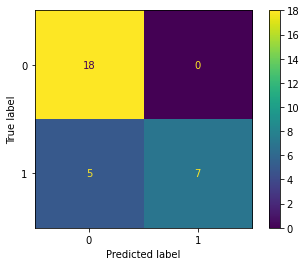

In [46]:
ConfusionMatrixDisplay.from_estimator(grid_model,scaled_X_test,y_test);

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        18
           1       1.00      0.58      0.74        12

    accuracy                           0.83        30
   macro avg       0.89      0.79      0.81        30
weighted avg       0.87      0.83      0.82        30



### Performance curves

In [48]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

Precision / Recall

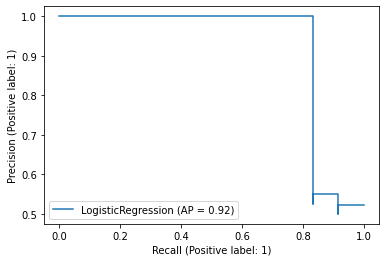

In [49]:
PrecisionRecallDisplay.from_estimator(grid_model.best_estimator_,scaled_X_test,y_test);

ROC

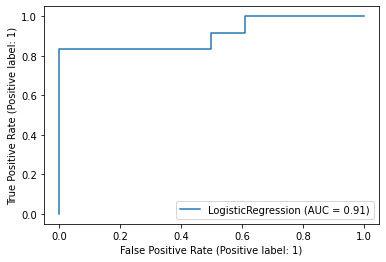

In [50]:
RocCurveDisplay.from_estimator(grid_model.best_estimator_,scaled_X_test,y_test);

## Prediction on a new patient

Let's create 2 new patients.

In [51]:
patient = [[ 48. ,   0. ,   2. , 130. , 275. ,   0. ,   1. , 139. ,   0. ,
          0.2,   2. ,   0. ,   2. ],
          [ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [52]:
log_model = grid_model.best_estimator_

In [53]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [54]:
X1 = pd.DataFrame(columns = X.columns, data=patient)
X1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,48.0,0.0,2.0,130.0,275.0,0.0,1.0,139.0,0.0,0.2,2.0,0.0,2.0
1,54.0,1.0,0.0,122.0,286.0,0.0,0.0,116.0,1.0,3.2,1.0,2.0,2.0


In [56]:
log_model.fit(scaled_X,df['num'])

LogisticRegression(C=3.359818286283781, max_iter=5000, penalty='l1',
                   solver='liblinear')

In [57]:
scaled_patient = scaler.transform(X1)

In [58]:
log_model.predict(scaled_patient)

array([0, 1])

In [59]:
log_model.predict_proba(scaled_patient)

array([[0.90621653, 0.09378347],
       [0.26504862, 0.73495138]])

The model predicts no heart disease for the first patient with high probability, and a presence of heart disease for the second one with a good probability.